In [44]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# % matplotlib inline

In [45]:
viols_file = "Restaurant_Scores_2.csv"
df_viols = pd.read_csv(viols_file)
df_viols.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation,risk_category
0,71065,"Chutney USA, Inc.",511 Jones St,San Francisco,CA,94102,37.786044,-122.413054,"(37.786044, -122.413054)",NaN,71065_20161221,12/21/16 0:00,NaN,Complaint,71065_20161221_103159,Worker safety hazards,Low Risk
1,34728,Pete's Tavern,128 KING STREET,San Francisco,CA,94107,37.779343,-122.390519,"(37.779343, -122.390519)",NaN,34728_20161213,12/13/16 0:00,90.0,Routine - Unscheduled,34728_20161213_103159,Worker safety hazards,Low Risk
2,19417,Starbucks,5 03rd St,San Francisco,CA,94103,37.787569,-122.403349,"(37.787569, -122.403349)",NaN,19417_20171128,11/28/17 0:00,96.0,Routine - Unscheduled,19417_20171128_103159,Worker safety hazards,Low Risk
3,71456,Sam's Cable Car Lounge,222 Powell St,San Francisco,CA,94102,37.786672,-122.408005,"(37.786672, -122.408005)",NaN,71456_20161205,12/5/16 0:00,96.0,Routine - Unscheduled,71456_20161205_103159,Worker safety hazards,Low Risk
4,1598,Cafe Bean,800 Sutter St,San Francisco,CA,94109,37.788587,-122.413795,"(37.788587, -122.413795)",NaN,1598_20171106,11/6/17 0:00,NaN,Reinspection/Followup,1598_20171106_103159,Worker safety hazards,Low Risk


In [48]:
print(f"There were {len(df_viols)} restaurant inspections with violation codes in SF in 2016-2018.")
#len(df_viols)

There were 16753 restaurant inspections with violation codes in SF in 2016-2018.


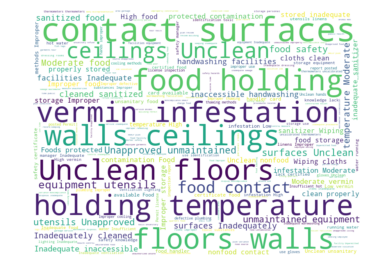

In [72]:
# words not included in wordcloud:
stopwords = set(STOPWORDS)
stopwords.update(["in", "for", "if", "or", "and", "risk", "degraded", ":"])

# generate a wordcloud image
wordcloud = WordCloud(stopwords = stopwords, 
                      width = 800, 
                      height = 600, 
                      max_font_size = 80, 
                      max_words = 200,
                      random_state = 42,
                      scale = 1, 
                      background_color="white").generate(' '.join(df_viols['violation']))

# show image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()
